In [2]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root as sp_root

from utils.solvers import FirstOrderDiffEqn
from utils.solvers.firstorder import num_sol_runge_kutta,num_sol_euler
from utils.plot.utils import draw_circle, draw_arrow

plt.rcParams["figure.figsize"] = (20, 5)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

# Misc Plots

A collection of misc plots from throughout the book. These are mostly used for the full notes, but not included in the notebooks.

## Lasers

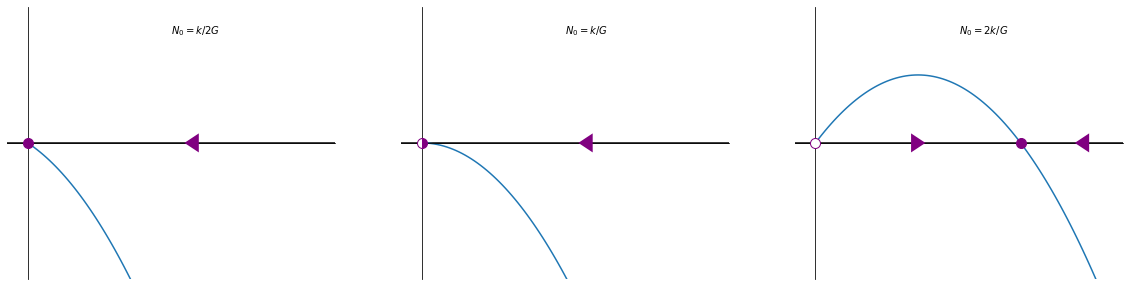

In [3]:
G = 1
alpha = 1
k = 1
laser_fn = lambda n, N_0: (G * N_0 - k) * n - G * alpha * n ** 2

for idx, N_0 in enumerate([k/(2 * G), k / G, 2 * k / G], start=1):
  n = np.linspace(0, 1.5, 100)
  n_dot = laser_fn(n, N_0)

  plt.subplot(1, 3, idx)
  plt.plot(n, n_dot)
  plt.axhline(color='black', zorder=-100)
  plt.ylim([-0.5, 0.5])
  plt.xlim([-0.1, 1.5])
  plt.gca().spines["left"].set_position("zero")
  plt.gca().spines["bottom"].set_position("zero")
  plt.gca().spines["right"].set_color("none")
  plt.gca().spines["top"].set_color("none")
  plt.xticks([])
  plt.yticks([])

plt.subplot(1, 3, 1)
draw_circle([0, 0], radius=10, type='full', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.07, head_length=0.07, zorder=100)
plt.text(0.7, 0.4, "$N_0 = k/2G$")

plt.subplot(1, 3, 2)
draw_circle([0, 0], radius=10, type='right', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.07, head_length=0.07, zorder=100)
plt.text(0.7, 0.4, "$N_0 = k/G$")

plt.subplot(1, 3, 3)
draw_circle([0, 0], radius=10, type='empty', zorder=100)
draw_circle([1, 0], radius=10, type='full', zorder=100)
draw_arrow([0.5, 0], direction='right', head_width=0.07, head_length=0.07, zorder=100)
draw_arrow([1.3, 0], direction='left', head_width=0.07, head_length=0.07, zorder=100)
plt.text(0.7, 0.4, "$N_0 = 2k/G$")

plt.show()

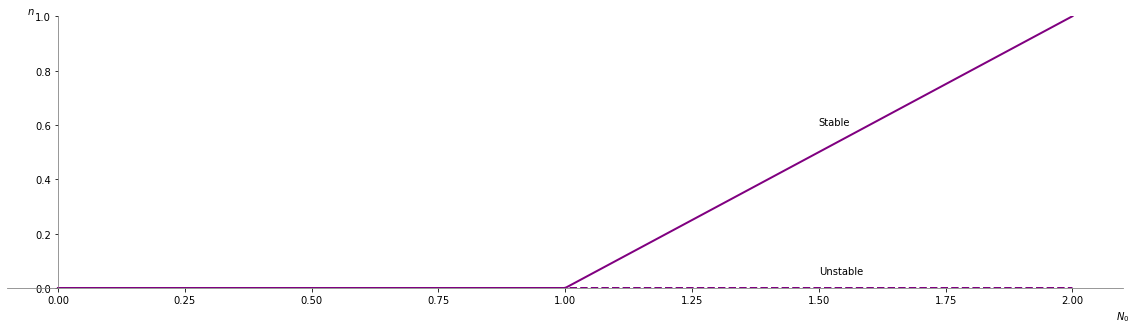

In [4]:
fixed_points = np.full([2, 2, 500], None)

for idx, N_0 in enumerate(np.linspace(0, 2*k/G, 500)):
  roots = sp_root(lambda n: laser_fn(n, N_0 - 1e-10), [-2, 2])

  if roots.success:
    fixed_points[0][0][idx] = N_0
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = N_0
    fixed_points[1][1][idx] = roots.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', ls="--", lw=2)
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(1.5, 0.05, "Unstable")
plt.text(1.5, 0.6, "Stable")

plt.xlabel("$N_0$", x=1)
plt.ylabel("$n$", rotation=0, y=1)
plt.ylim([0, 1])

plt.show()